In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng = np.random
%matplotlib inline

In [3]:
learning_rate = 0.01
epochs = 1000
display_step = 50

In [4]:
# Training Data
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]
n_samples

17

In [5]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(rng.rand(), name="weight")
b = tf.Variable(rng.rand(), name="bias")

In [6]:
pred = tf.add(tf.mul(X, W), b)

In [7]:
cost = tf.reduce_sum(tf.pow(pred - Y, 2))/(2*n_samples)
#cost = tf.reduce_mean(tf.square(pred - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [8]:
init = tf.initialize_all_variables()

In [36]:
with tf.Session() as sess:
    sess.run(init)
    
    
    for epoch in range(epochs):
        for (x,y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
            
            if (epoch+1) % display_step == 0:
                c = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
                print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)
                
    print "Optimization Finished!"
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'

Epoch: 0050 cost= 0.102767453 W= 0.340502 b= 0.153674
Epoch: 0050 cost= 0.102662899 W= 0.34337 b= 0.154326
Epoch: 0050 cost= 0.102668710 W= 0.343522 b= 0.154353
Epoch: 0050 cost= 0.102987446 W= 0.346406 b= 0.154783
Epoch: 0050 cost= 0.102648936 W= 0.342895 b= 0.154276
Epoch: 0050 cost= 0.102648742 W= 0.342869 b= 0.15427
Epoch: 0050 cost= 0.102649577 W= 0.342057 b= 0.154187
Epoch: 0050 cost= 0.102653377 W= 0.343247 b= 0.15438
Epoch: 0050 cost= 0.102643728 W= 0.342222 b= 0.154245
Epoch: 0050 cost= 0.102631204 W= 0.342636 b= 0.154436
Epoch: 0050 cost= 0.102663226 W= 0.343712 b= 0.154589
Epoch: 0050 cost= 0.102661870 W= 0.341182 b= 0.154354
Epoch: 0050 cost= 0.102749415 W= 0.340191 b= 0.154168
Epoch: 0050 cost= 0.102735288 W= 0.340329 b= 0.154185
Epoch: 0050 cost= 0.102647111 W= 0.341465 b= 0.154386
Epoch: 0050 cost= 0.102838859 W= 0.339394 b= 0.154163
Epoch: 0050 cost= 0.102812059 W= 0.339565 b= 0.154218
Epoch: 0100 cost= 0.099780500 W= 0.335104 b= 0.192204
Epoch: 0100 cost= 0.099680677 W

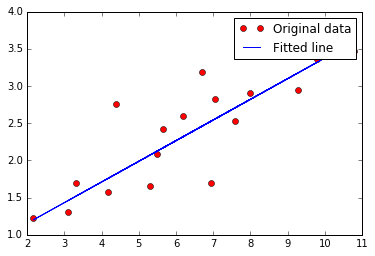

In [29]:
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, (0.277657 * train_X) + 0.599582, label='Fitted line')
plt.legend()
plt.show()

<function tensorflow.python.framework.ops.device>